In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [4]:
train.isnull().any()

id                           False
RhythmScore                  False
AudioLoudness                False
VocalContent                 False
AcousticQuality              False
InstrumentalScore            False
LivePerformanceLikelihood    False
MoodScore                    False
TrackDurationMs              False
Energy                       False
BeatsPerMinute               False
dtype: bool

In [5]:
train.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257587,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


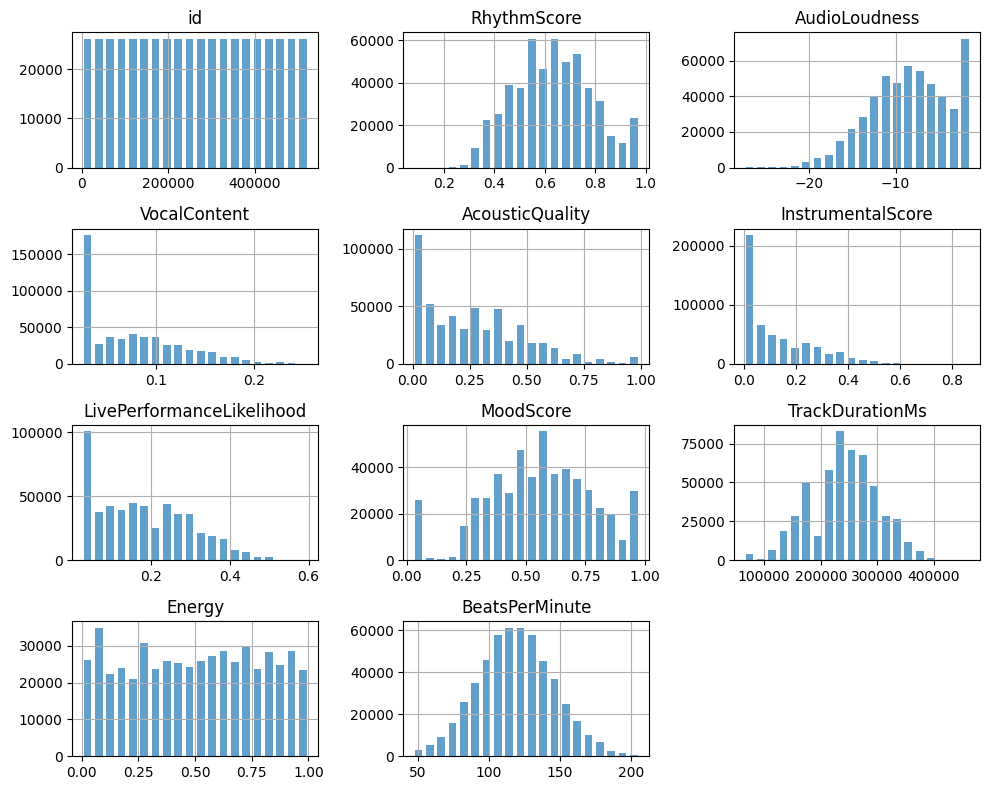

In [25]:
train.hist(
    figsize=(10,8),
    alpha=0.7,
    bins=20,
    rwidth= 0.7
)
plt.tight_layout()
plt.show()

### Distribution analysis
#### Uniform:
- Energy
#### Normal:
- RhythmScore
- MoodScore
- TrackDurationMs
#### "Exponential":
- VocalContent
- AcousticQuality
- InstrumentalScore
- LivePerformanceLikehood

#### Target value fits uniform distribution --> No disbalance fixing measures required

### Correlation with target

In [26]:
pd.DataFrame(train.corr().BeatsPerMinute.sort_values(ascending=False))

,BeatsPerMinute
BeatsPerMinute,1.000000
MoodScore,0.007059
TrackDurationMs,0.006637
RhythmScore,0.005440
VocalContent,0.004876
LivePerformanceLikelihood,0.003471
InstrumentalScore,0.001900
id,-0.000355
AcousticQuality,-0.000820
AudioLoudness,-0.003327


In [30]:
train["RhythmScoreSD"] = pd.cut(train["RhythmScore"],10)
train[["RhythmScoreSD","BeatsPerMinute"]].groupby(by="RhythmScoreSD",as_index=False).mean().sort_values(by="RhythmScoreSD")

/tmp/ipykernel_22437/3776405481.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train[["RhythmScoreSD","BeatsPerMinute"]].groupby(by="RhythmScoreSD",as_index=False).mean().sort_values(by="RhythmScoreSD")


,RhythmScoreSD,BeatsPerMinute
0,"(0.076, 0.167]",120.647696
1,"(0.167, 0.257]",115.962598
2,"(0.257, 0.346]",118.456734
3,"(0.346, 0.436]",118.737459
4,"(0.436, 0.526]",118.817588
5,"(0.526, 0.616]",119.006231
6,"(0.616, 0.706]",119.133384
7,"(0.706, 0.795]",119.260607
8,"(0.795, 0.885]",119.240091
9,"(0.885, 0.975]",119.016603
